In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [58]:
from google.colab import files
uploaded=files.upload()

Saving winequality-red.csv to winequality-red (2).csv


In [59]:
import io
df=pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [60]:
for i in range(len(df.quality)):
  if df.quality[i]>=6.5:
    df.quality[i]=1
  else:
    df.quality[i]=0
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


{0: 1382, 1: 217}


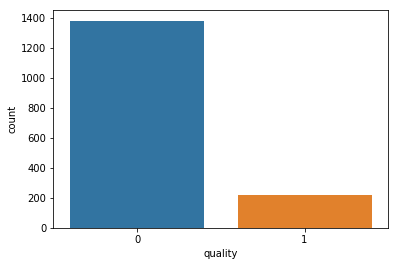

In [61]:
d={}
for keys in df.quality.unique():
  d[keys]=0
for i in df.quality:
  d[i]+=1
print(d)
sns.countplot(df.quality)
  

In [0]:
X=df.drop("quality",axis=1)
y=df.quality

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.2)
print(len(X_train))
print(len(X_test))

1279
320


In [0]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

**Random Forest Classifier**

In [65]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       276
           1       0.53      0.20      0.30        44

    accuracy                           0.87       320
   macro avg       0.71      0.59      0.61       320
weighted avg       0.84      0.87      0.84       320

[[268   8]
 [ 35   9]]


**Support Vector Machine**

In [74]:
clf2=svm.SVC()
clf2.fit(X_train,y_train)
clf2_pred=clf2.predict(X_test)
print(classification_report(clf2_pred,y_test))
print(confusion_matrix(y_test,clf2_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       305
           1       0.20      0.60      0.31        15

    accuracy                           0.87       320
   macro avg       0.59      0.74      0.62       320
weighted avg       0.94      0.87      0.90       320

[[270   6]
 [ 35   9]]


In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [81]:
clf3=AdaBoostClassifier()
clf3.fit(X_train,y_train)
clf3_pred=clf3.predict(X_test)
print(classification_report(clf3_pred,y_test))
print(confusion_matrix(y_test,clf3_pred))



              precision    recall  f1-score   support

           0       0.97      0.90      0.93       296
           1       0.34      0.62      0.44        24

    accuracy                           0.88       320
   macro avg       0.65      0.76      0.69       320
weighted avg       0.92      0.88      0.90       320

[[267   9]
 [ 29  15]]


In [82]:
clf4=KNeighborsClassifier()
clf4.fit(X_train,y_train)
clf4_pred=clf4.predict(X_test)
print(classification_report(clf4_pred,y_test))
print(confusion_matrix(y_test,clf4_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       290
           1       0.39      0.57      0.46        30

    accuracy                           0.88       320
   macro avg       0.67      0.74      0.69       320
weighted avg       0.90      0.88      0.89       320

[[263  13]
 [ 27  17]]
